In [26]:
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import konfuzio_sdk
from konfuzio_sdk.data import Project
from konfuzio_sdk.tokenizer.regex import WhitespaceTokenizer
from tests.variables import OFFLINE_PROJECT

In [31]:
# !pip show konfuzio_sdk
#!conda init bash
#!conda activate konfuzio
# !konfuzio_sdk init

In [3]:
import transformers

In [4]:
# transformers.__version__

In [5]:
from transformers import AutoProcessor
# from datasets.features import ClassLabel
# from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D
# from datasets import load_metric
import torch
from transformers import LayoutLMv3ForTokenClassification
from transformers.data.data_collator import default_data_collator
from transformers import AutoModelForTokenClassification
from PIL import Image, ImageDraw, ImageFont

In [17]:
project = Project(id_=None, project_folder=OFFLINE_PROJECT)

In [21]:
len(project.documents)

26

In [32]:
documents = project.documents #_by_id(44859) #(141131) #(44823)

# document.get_text_in_bio_scheme()
# document.get_bbox()

In [54]:
#txt_info = {'bio_scheme'}
# for i, e in enumerate(document.get_text_in_bio_scheme()):
#     if ' ' in e[0]:
#         print(i, e)
d = documents[0]
# d.get_bbox()
#dir(d)
d.get_images()
d.image_paths

['/home/sam-konf/Konfuzio/konfuzio-sdk/tests/example_project_data/documents/44823/page_1.png']

In [63]:

def get_txt_bbox_info(doc):
    try:
        bio_scheme = doc.get_text_in_bio_scheme()
    except ValueError as e:
        print(e)
        return
    bbox = doc.get_bbox()
    print('l bbox', len(bbox))
    text = doc.text
    while "  " in text:
        text = text.replace('  ', ' ')
    print('l text', len(text), len(text.replace(' ', '').replace('\n', '')))
    bio_txt = ' '.join([e[0] for e in bio_scheme if e[1]=='O'])
    print('l bio', len(bio_txt), len(bio_txt.replace(' ', '').replace('\n', '')))
    
    bbox_txt = ''.join([bbox[k]['text'] for k in sorted(bbox.keys(), key=lambda x: int(x))])
    #bbox_txt.replace(' ', '').replace('\n', '')
    print('bbox,text', len(bbox_txt))
    
    try:
        doc.get_images()

        img = Image.open(d.image_paths[0])
    except PermissionError:
        print(doc)
    
#     try:
#         assert len(text) <= len(bio_txt)
#     except AssertionError:
#         print
    #print()
    
    # ...
    
    
    

In [64]:
data = []
for i, doc in enumerate(documents):
    print(i)
    get_txt_bbox_info(doc)
    

0
l bbox 2249
l text 2594 2230
l bio 2602 2222
bbox,text 2249
1
l bbox 2248
l text 2582 2229
l bio 2590 2223
bbox,text 2248
Document Festlohn.pdf (44834)
2
l bbox 2307
l text 2657 2288
l bio 2658 2281
bbox,text 2307
Document vermögenswirksame Leistungen.pdf (44839)
3
l bbox 2146
l text 2467 2128
l bio 2476 2122
bbox,text 2146
Document betriebliche Altersvorsorge AG finanziert.pdf (44840)
4
l bbox 2363
l text 2716 2344
l bio 2727 2337
bbox,text 2363
Document Weihnachtsgeld.pdf (44841)
5
l bbox 2304
l text 2659 2285
l bio 2664 2277
bbox,text 2304
Document Stundenlohn.pdf (44842)
6
l bbox 2207
l text 2534 2188
l bio 2549 2182
bbox,text 2207
Document Fahrtkostenzuschuss pauschal versteuert.pdf (44843)
7
l bbox 2339
l text 2692 2321
l bio 2706 2313
bbox,text 2339
Document Betirebliche Altersvorsorge Mischfinanzierung.pdf (44845)
8
l bbox 2335
l text 2682 2317
l bio 2700 2310
bbox,text 2335
Document Darlehen.pdf (44846)
9
l bbox 2426
l text 2779 2407
l bio 2789 2402
bbox,text 2426
Document D

[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to

l bbox 2259
l text 2606 2241
l bio 2615 2235
bbox,text 2259
Document Auswertungspaket - unterschiedliche B_N-Auswertungen.pdf_1.pdf (44848)
11
l bbox 2245
l text 2583 2226
l bio 2582 2218
bbox,text 2245
Document Auswertungspaket - unterschiedliche B_N-Auswertungen.pdf_2.pdf (44850)
12
l bbox 2271
l text 2618 2252
l bio 2619 2244
bbox,text 2271
Document Auswertungspaket - unterschiedliche B_N-Auswertungen.pdf_4.pdf (44851)
13
l bbox 2368
l text 2724 2349
l bio 2734 2343
bbox,text 2368
Document Auswertungspaket - unterschiedliche B_N-Auswertungen.pdf_3.pdf (44852)
14
l bbox 2293
l text 2644 2274
l bio 2646 2267
bbox,text 2293
Document Auswertungspaket - unterschiedliche B_N-Auswertungen.pdf_5.pdf (44853)
15
l bbox 2228
l text 2575 2210
l bio 2580 2204
bbox,text 2228
Document Auswertungspaket - unterschiedliche B_N-Auswertungen.pdf_6.pdf (44854)
16
l bbox 2366
l text 2714 2347
l bio 2726 2341
bbox,text 2366
Document Auswertungspaket - unterschiedliche B_N-Auswertungen.pdf_7.pdf (44855)
17

[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to

l bbox 2230
l text 2571 2211
l bio 2572 2205
bbox,text 2230
Document 2022-01-30 07:22:29.106312 (44860)
22
l bbox 2250
l text 2603 2232
l bio 2608 2227
bbox,text 2250
Document 2022-01-30 07:12:04.725599 (44861)
23
l bbox 2276
l text 2627 2258
l bio 2633 2252
bbox,text 2276
Document 2022-02-07 11:17:51.957252 (44862)
24
l bbox 2237
l text 2579 2219
l bio 2586 2214
bbox,text 2237
Document 2022-01-30 06:57:53.988011 (44863)
25
Document Document 2022-02-13 16:19:30.684745 (44864) without Category must not have Annotations


[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/sam-konf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
len(documents)

26

In [ ]:
len(document.text.replace(' ', '').replace('\n', ''))
#txt[0]

In [ ]:
#"DATEV" in document.text

In [ ]:
off = 0
doc_txt = document.text.replace(' ', '').replace('\n', '')
for i, c in enumerate(doc_txt):
#     if c == 'A':
#         print(ord(document.text.replace(' ', '')[i]))
#         raise
   
    print(c, all_txt[i-off])
    if c != all_txt[i-off]:
        off += 1
        #print(i)
        #raise
print(off)

In [ ]:
document.annotations()[0].offset_string

In [ ]:
# dir(document.annotations()[0])

In [ ]:
document.annotations()[0] #.bboxes

In [ ]:
len(document.annotations())

In [ ]:
len(document.text.replace(' ', '').replace('\n', ''))

In [ ]:
# f = "®"

In [ ]:
# document.text.replace(' ', '').replace('\n', '') == txt3

In [ ]:
# f in document.text

In [ ]:
document

In [ ]:
tokenizer = WhitespaceTokenizer()
tokenizer.tokenize(document)
x0_coordinate = document.annotations(use_correct=False)[0].spans[0].x0
#print(document.pages)


In [ ]:
#dir(document.pages[0])
anns = document.annotations(use_correct=True, fill=True)#use_correct=False)

In [ ]:
len(anns)

In [ ]:
#anns[1].bboxes #.bbox() #x0 #.offset_string[0] #.bboxes() #.strip()

In [ ]:
#dir(anns[0])

In [ ]:
#dir(document)

In [ ]:
#document.get_bbox()

In [ ]:
len(document.get_bbox())

In [ ]:
#document.annotations()
pb = 0
for d in project.documents:
    try:
        if len(d.pages) != 1: #annotations():
            pb += 1
    except:
        pb +=1
        print('pb')
        
        raise
print(pb)
            

In [ ]:
#dir(document.pages[0])

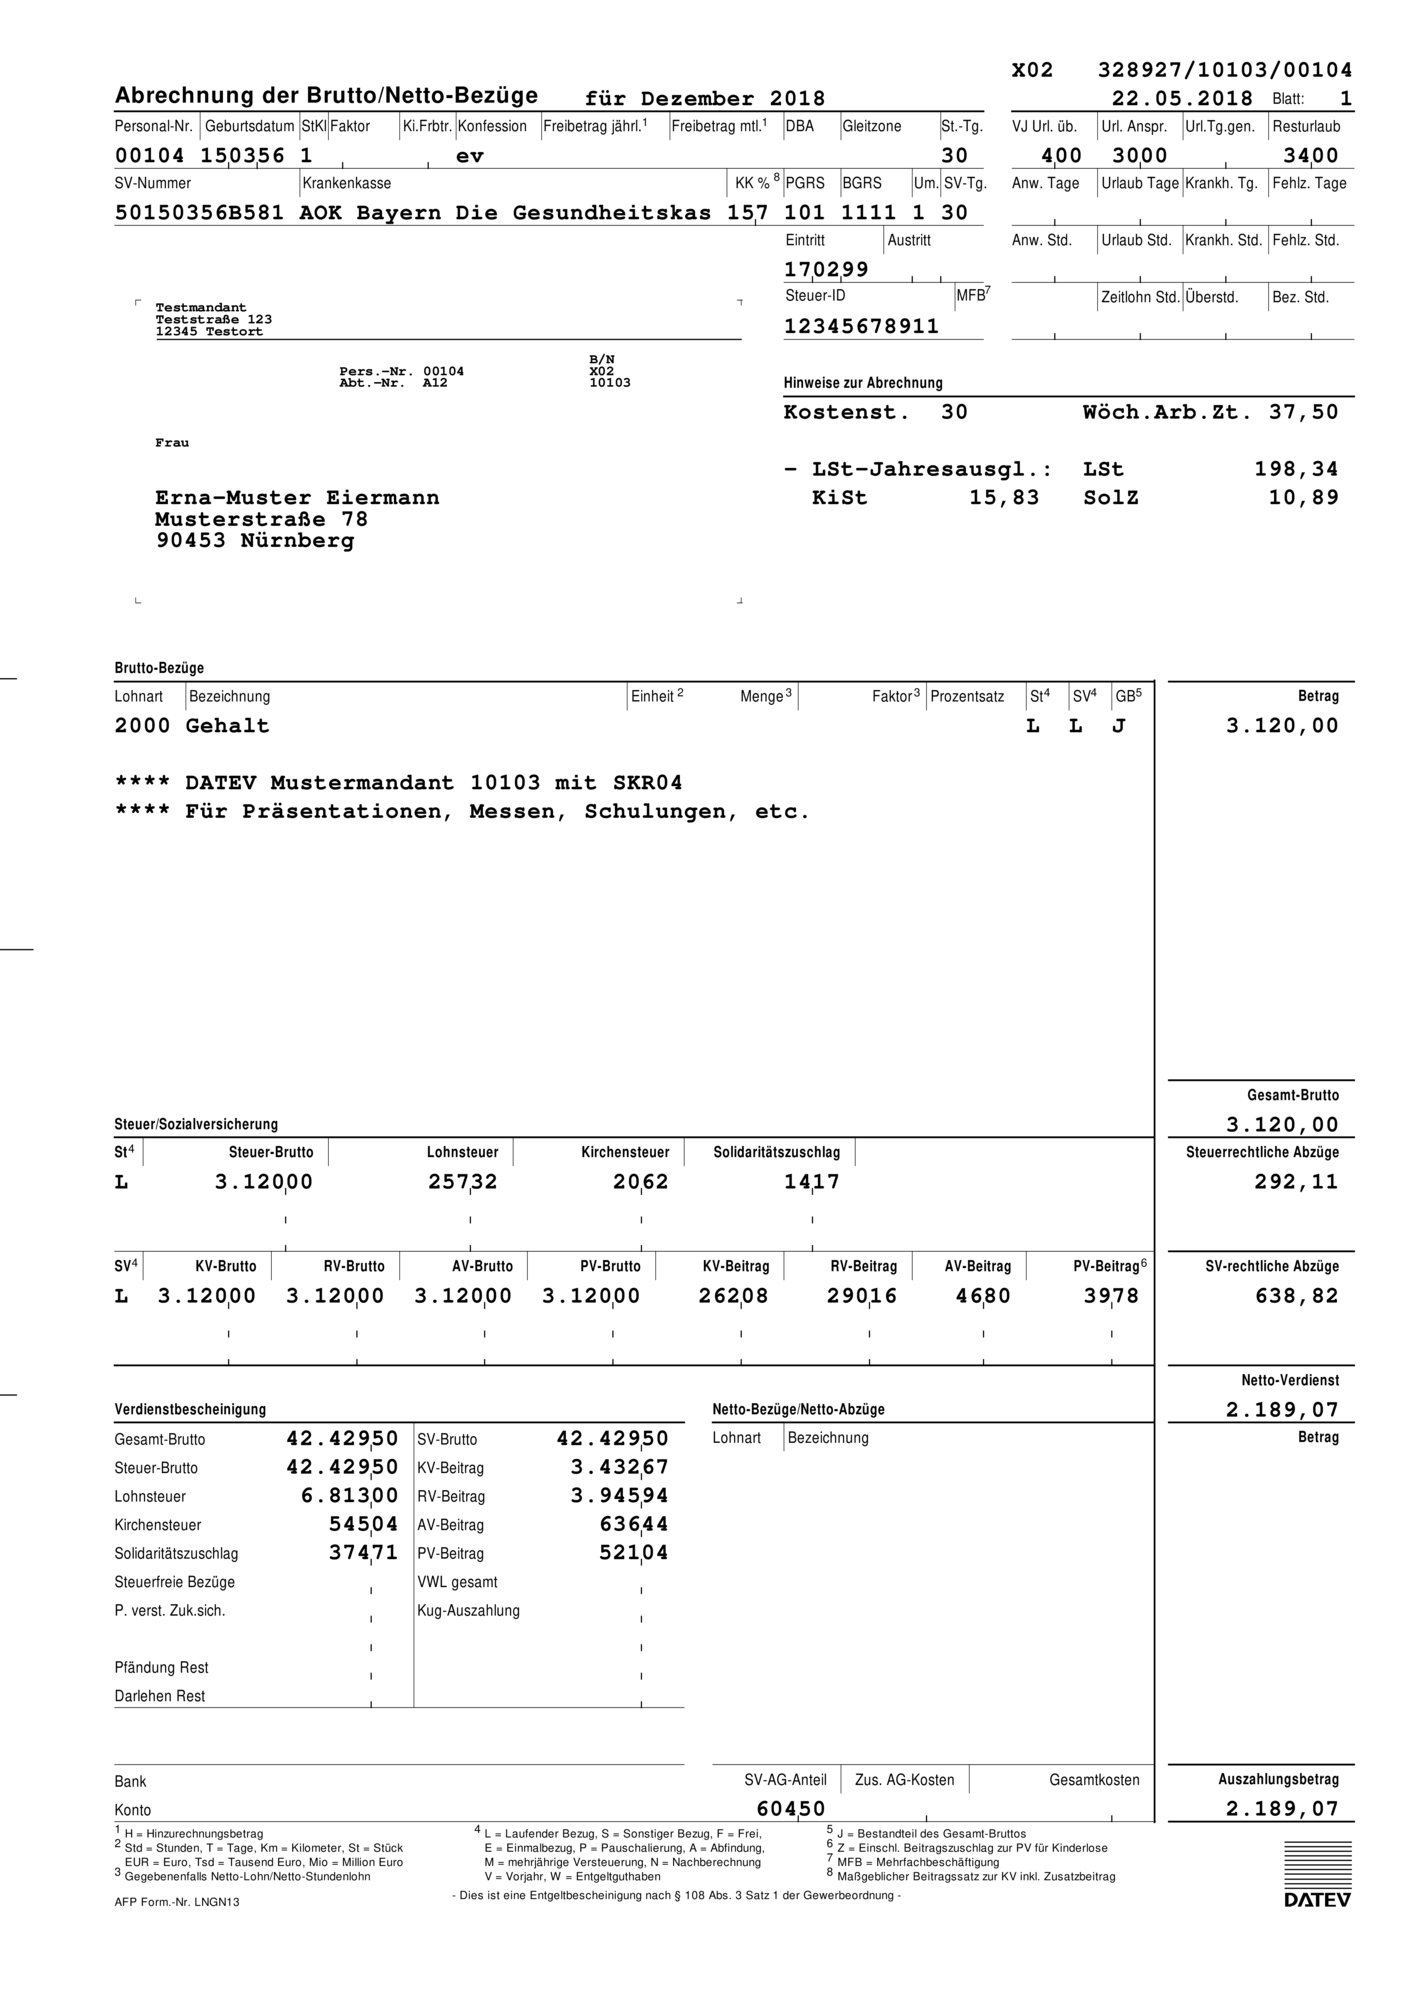

In [45]:
img = Image.open("../tests/example_project_data/documents/44823/page_1.png")
img

<ipython-input-46-20908fdf8af3>:1: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((224,224), Image.ANTIALIAS)


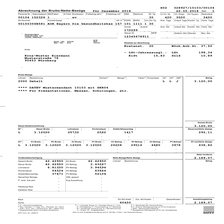

In [46]:
img = img.resize((224,224), Image.ANTIALIAS)
img